In [9]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



amazn_df = pd.read_csv('AMZN_Stock_Data.csv')



In [10]:
amazn_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200
1,2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200
2,2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000
3,2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300
4,2015-01-08,300.320007,303.140015,296.109985,300.459991,300.459991,3088400


In [11]:
amazn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1497 non-null   object 
 1   Open       1497 non-null   float64
 2   High       1497 non-null   float64
 3   Low        1497 non-null   float64
 4   Close      1497 non-null   float64
 5   Adj Close  1497 non-null   float64
 6   Volume     1497 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.0+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1497 non-null   datetime64[ns]
 1   Open       1497 non-null   float64       
 2   High       1497 non-null   float64       
 3   Low        1497 non-null   float64       
 4   Close      1497 non-null   float64       
 5   Adj Close  1497 non-null   float64       
 6   Volume     1497 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 82.0 KB


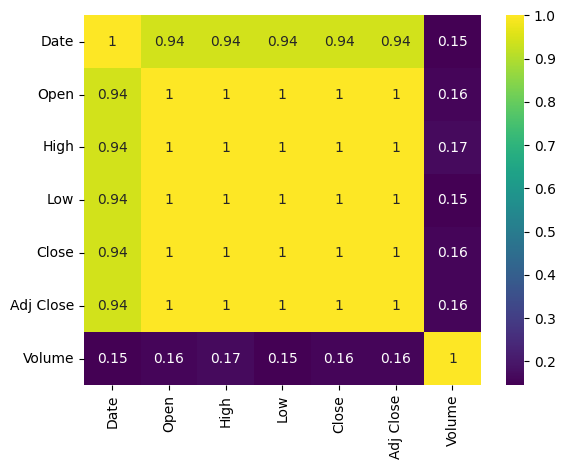

In [12]:
amazn_df['Date'] = pd.to_datetime(amazn_df['Date'])

amazn_df.info()
sbn.heatmap(amazn_df.corr(),annot=True, cmap='viridis')
plt.show()

In [13]:
# Adding the 'Predict' column with predicted closing prices for the next 30 days
projection = 30
amazn_df['Predict'] = amazn_df["Adj Close"].shift(-projection) 


In [14]:
# Extract features and target variable
X = amazn_df[['Open', 'High', 'Low', 'Adj Close']]
Y = amazn_df['Predict']
X, Y = X[:-projection], Y[:-projection]  

In [15]:

# Split the dataset into a training set and a test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
# Create a linear regression model and use standardization
model = make_pipeline(StandardScaler(), LinearRegression())

In [17]:
# Train the model on the training data
model.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [18]:

# Make predictions on the test data
Y_pred = model.predict(X_test)

In [19]:
# Evaluate the model's performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [20]:
# Print the model's coefficients and performance metrics
print('Intercept:', model.named_steps['linearregression'].intercept_)
print('Coefficients:', model.named_steps['linearregression'].coef_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Intercept: 1374.5119352293266
Coefficients: [-351.03337564  979.92271158 -282.18182444  399.90417962]
Mean Squared Error: 21182.259199911634
R-squared: 0.966721607431006


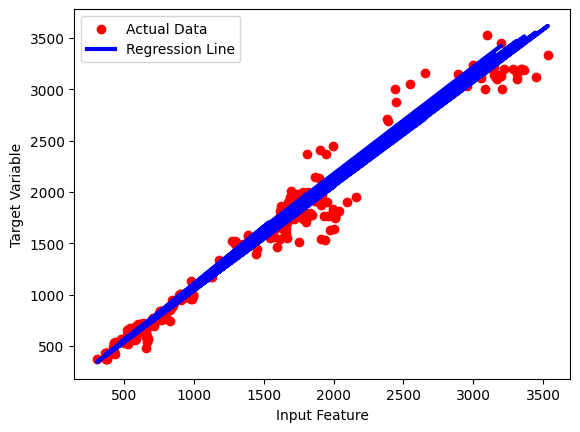

In [25]:
# Plot the regression line
plt.scatter(X_test['Adj Close'], Y_test, color='red', label='Actual Data')
plt.plot(X_test['Adj Close'], Y_pred, color='b', linewidth=3, label='Regression Line')
plt.xlabel("Input Feature")
plt.ylabel("Target Variable")
plt.legend()
plt.show()